# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
from skimage import io, color, util, filters
import cv2

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [3]:
def convert_image_negative(img):
    converted_img = np.array(img)
    converted_img = 255 - img
    return converted_img


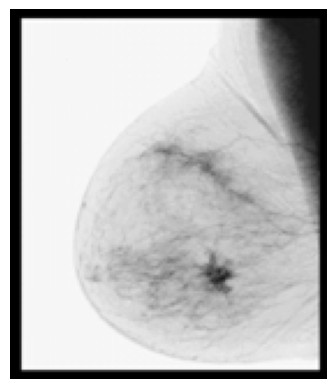

In [4]:
img = io.imread('imgs/Picture1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

negative_img = convert_image_negative(img)


plt.imshow(negative_img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
def Contrast_enhancement(img):
    converted_img = np.copy(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            print(img[i][j])
            if img[i][j]<=100:
                converted_img[i][j] = (150 / 100) * img[i][j] + 50

    return converted_img.astype(np.uint8)

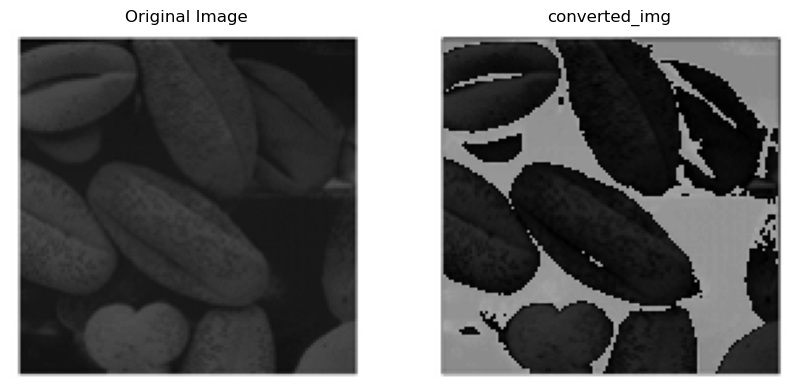

In [6]:
img = io.imread('imgs/Picture2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
converted_img = Contrast_enhancement(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('converted_img')
plt.imshow(converted_img, cmap='gray')
plt.axis('off')

plt.show()


In [144]:
def Gamma_Correction(img,c,gamma):
    converted_img = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            corrected_value = c * (img[i][j]/255.0)**gamma
            converted_img[i][j] = np.clip(corrected_value * 255, 0, 255)


    return converted_img



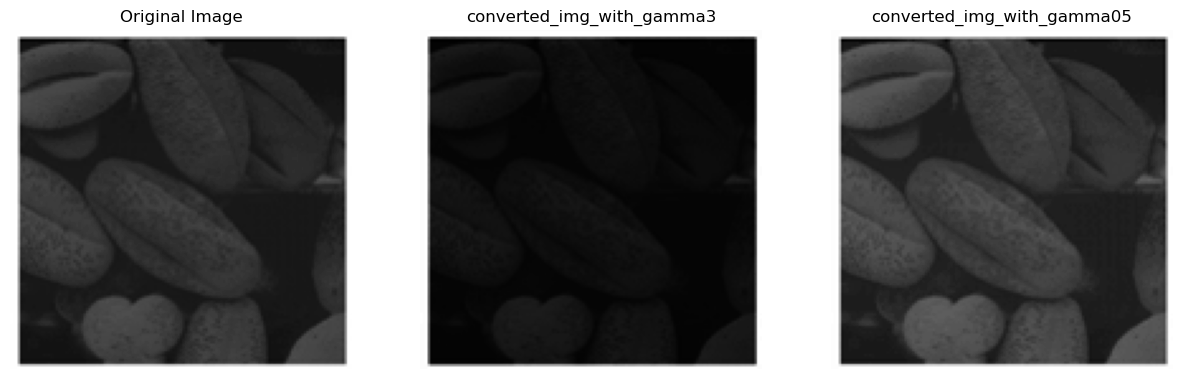

In [145]:
img = io.imread('imgs/Picture2.png')
img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
converted_img_with_gamma3 = Gamma_Correction(img,1,3)
converted_img_with_gamma05 = Gamma_Correction(img,1,0.5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('converted_img_with_gamma3')
plt.imshow(converted_img_with_gamma3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('converted_img_with_gamma05')
plt.imshow(converted_img_with_gamma05, cmap='gray')
plt.axis('off')

plt.show()

the effect of decreasing gamma is making the image more light(bight)

In [151]:
def histogram_equalization(img):
    G = 256 
    H = np.zeros(G, dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H[img[i][j]] += 1

    accumilate = np.zeros(G, dtype=int)
    accumilate[0] = H[0]
    for p in range(1, G):
        accumilate[p] = accumilate[p - 1] + H[p]

    N, M = img.shape
    q = np.round((G - 1) * (accumilate / (N * M))).astype(int)

    equalized_img = np.zeros_like(img)
    for i in range(N):
        for j in range(M):
            equalized_img[i, j] = q[img[i, j]]

    return equalized_img

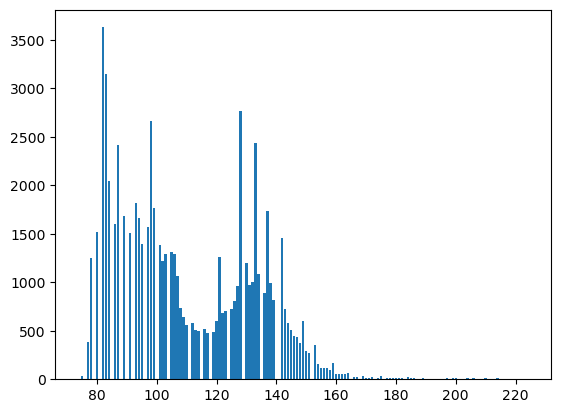

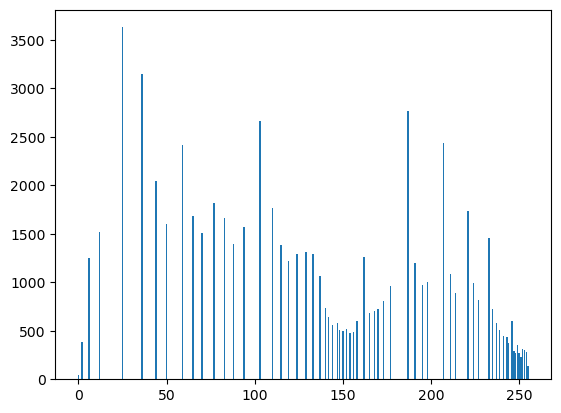

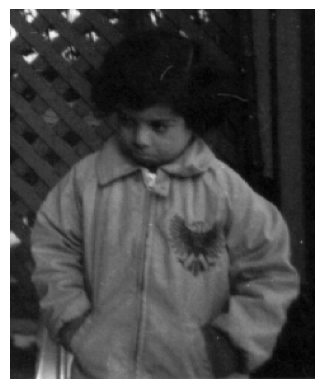

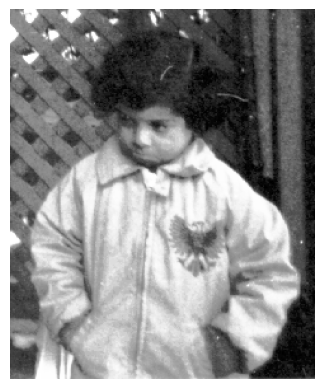

In [154]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
img = io.imread('imgs/pout.tif')
modified_img = histogram_equalization(img)
showHist(img)
showHist(modified_img)
plt.show()

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(modified_img, cmap='gray')
plt.axis('off')
plt.show()

    


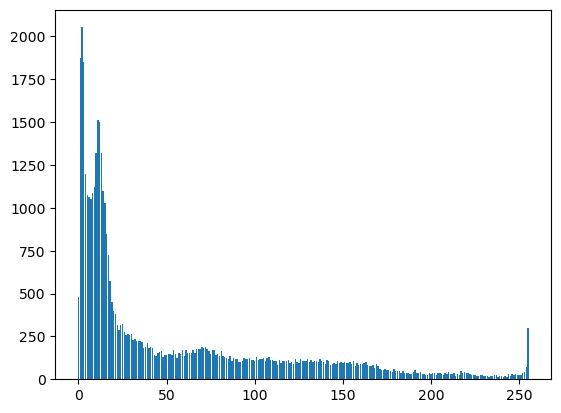

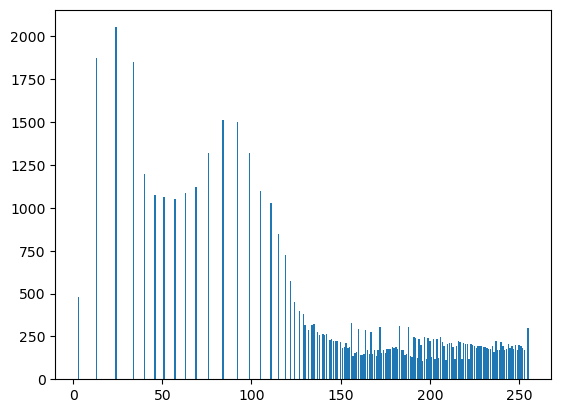

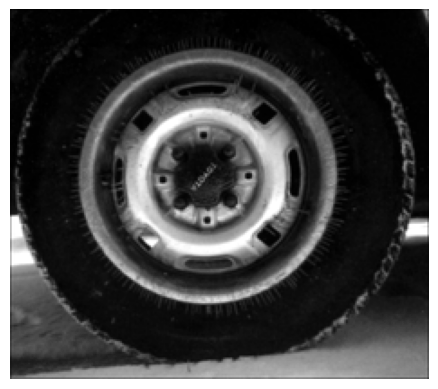

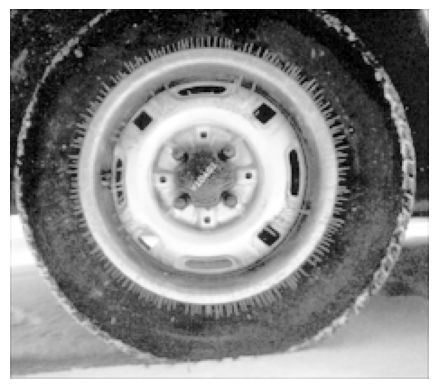

In [155]:
img = io.imread('imgs/tire.tif')
modified_img = histogram_equalization(img)
showHist(img)
showHist(modified_img)
plt.show()

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(modified_img, cmap='gray')
plt.axis('off')
plt.show()